In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
from tweets_list import loadJoblib

tweets_list = loadJoblib("lst.joblib")

In [4]:
from remove import *

removed_new_line_marks = remove_new_line_marks(tweets_list)
removed_new_line_marks_all_blanks = remove_all_blanks(removed_new_line_marks)

# removed_usermention = remove_usermention(removed_new_line_marks_all_blanks)
removed_usermention = loadJoblib('removed_usermention.joblib')
removed_usermention_url = remove_url(removed_usermention)
removed_usermeniton_url_hashtag = remove_hashtag_a_series_of_words(removed_usermention_url)

In [5]:
num = 0
tmp = []

for tweet in removed_usermention_url:
    if tweet not in removed_usermeniton_url_hashtag:
        num += 1
        tmp.append(tweet)
        
tmp[:20]

['きもいって似たような内容マジお前やべーな #Peing #質問箱 ',
 '面白さランキングけものすらいむさんは【全国2位】です！#shindanmaker #あなたランキング',
 '【創作】BONBON | 日暮ずむ #pixiv ',
 '「情強」こそ危ない？Amazon販売業者の最新テクニック3つ #ldnews ',
 'そういう質問年齢バレるからやだ#Boxfresh ',
 '#Spoon DJのまさやんぐです。LIVE配信に遊びに来てね！',
 '言語アルバム賞を獲っていない桑布伊の年度アルバム賞受賞については、やっぱりちょっと納得いかないところがあって。これでは言語アルバム賞を受賞した漂流出口の立場が微妙ではないかと。この2つの賞の意義の違いが、分かりにくいトコなのかなぁ…。 #GMA32 #金曲32 ',
 'ゲロ姉ぇが強く見えるかもしれない#デッドバイデイライト #DeadbyDaylight #DbD #プレイグ ',
 '瀬戸は没に襲われるツクリテと遭遇する。貴方がニジゲンであればツクリテのサポートを行い、感謝の印として切符を1つ得る。貴方がツクリテであれば、マキナで応戦し辛くもその場を乗り切る。体力−1、狂気を2下げる。#shindanmaker #感情線電車の旅',
 'kuuとボイスつけながらゲームした時 #Peing #質問箱 ',
 '【最速の英単語アプリmikanで毎日の英単語 日常頻出語の90%をマスターするカテゴリーのランク25が修了したことを証します】 #英単語アプリmikan #1日で100単語は余裕 #mikan ',
 '1. ぎゅってしたい2. いじめたい3. くすぐりあいっこしたい4. １日良いなりになって欲しい5. 食べてしまいたい6. マッスルドッキング7. ふとももすりすりしたい8. セクロスしたい9. キスしたい10.お帰りくださ…#shindanmaker #いいねをした人に番号言う_MANIAC',
 '昨日は軽めのおつまみ＋わらび〜餅🎶甘いの苦手な私ですが、わらび餅は美味しい。夏🎐・冷やしトマト・もやしナムル・わらび餅《伊藤摩美》#順風男女#昨日の晩酌#わらび餅には緑茶ハイ#enjoyhome ',
 '#おはエレナイトはの夏衣装はパールホワイトサマーです♪レベル上げ中と思ってたら80になってた

In [6]:
# from tweets_list import dumpJoblib
# dumpJoblib('removed_usermention.joblib', removed_usermention)

# User Mention ○

In [7]:
from count_the_number import count_the_number_of_user_mention

user_mention_cnt, user_mention_list = count_the_number_of_user_mention(removed_new_line_marks_all_blanks)
user_mention_cnt

4401

# URL○

In [8]:
from count_the_number import count_the_number_of_url

url_cnt, url_list = count_the_number_of_url(removed_new_line_marks_all_blanks)
url_cnt

1564

# ハッシュタグ

In [9]:
from count_the_number import count_the_number_of_hashtag

hashtag = count_the_number_of_hashtag(removed_new_line_marks_all_blanks)
hashtag

799

# 英語・日本語(#後の英語も含む)

In [11]:
from contained_english import count_the_number_of_mixed_tweet
contained_cnt, contained_list = count_the_number_of_mixed_tweet(removed_usermention_url)
contained_cnt

2063

# 英語・日本語(#を除いて考えた場合)

In [12]:
contained_cnt2, contained_list2 = count_the_number_of_mixed_tweet(removed_usermeniton_url_hashtag)
contained_cnt2

1991

# 分析

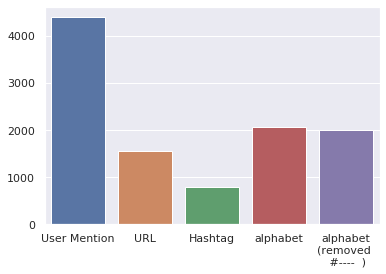

In [15]:
x = ['User Mention', 'URL', 'Hashtag', 'alphabet', 'alphabet\n(removed \n #----  )' ]
y = [user_mention_cnt, url_cnt, hashtag, contained_cnt, contained_cnt2]

figure = sns.barplot(x, y).get_figure()
figure.savefig('result1')


# wの検討

In [ ]:
from count_the_number import count_the_number_of_w

count_the_number_of_w(removed_usermeniton_url_hashtag)